In [38]:
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
from functools import partial

In [39]:
key = jr.PRNGKey(4)

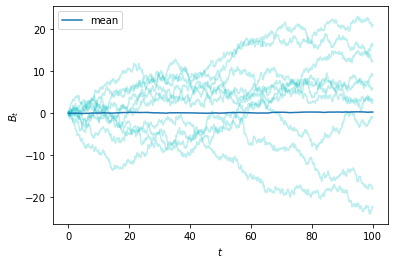

In [40]:
n_steps = 1000
n_samples = 1000
time_step = 0.1
t = jnp.linspace(0, time_step * n_steps, n_steps)
increments = jr.normal(key, (n_steps, n_samples)) * jnp.sqrt(time_step)
brownian_motion = jnp.cumsum(increments, axis=0)
for i in range(0,n_samples,100):
    plt.plot(t, brownian_motion[:,i], 'c', alpha = 0.25)
plt.plot(t, brownian_motion.mean(1), label = 'mean')
plt.xlabel('$t$')
plt.ylabel('$B_t$')
plt.legend()
plt.savefig('../seminar_talk/plots/brownian_motion.pdf')

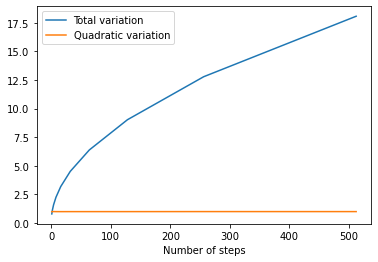

In [41]:
final_time = 1
n_samples = 10000
n_steps = 2 ** jnp.arange(0, 10)
time_steps = final_time / n_steps
total_variations = []
quadratic_variations = []
for n_step, time_step in zip(n_steps, time_steps):
    key, normal_key = jr.split(key)
    increments = jr.normal(
        normal_key, (n_step, n_samples)) * jnp.sqrt(time_step)
    total_variations.append(jnp.abs(increments).sum(0).mean(0))
    quadratic_variations.append((increments ** 2).sum(0).mean(0))

plt.plot(n_steps, total_variations, label='Total variation')
plt.plot(n_steps, quadratic_variations, label='Quadratic variation')
plt.xlabel('Number of steps')
plt.legend()
plt.savefig('../seminar_talk/plots/brownian_motion_variation.pdf')
